## About
This notebook does one thing, which is plot the $R_g$ distribution for the subset of sequences we examine in Figure 3 for comparison with SAXS data with the experimental average SAXS $R_g$ value superimposed over the STARLING $R_g$ distribution.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib as mpl

mpl.rcParams['xtick.major.pad'] = 1
mpl.rcParams['ytick.major.pad'] = 1

mpl.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
mpl.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
mpl.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
mpl.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

mpl.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
mpl.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.375

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
from scipy.signal import savgol_filter
from starling import load_ensemble

In [2]:
saxs_rgs = {}
with open('experiment/mff_analysis_all.csv','r') as fh:
    content = fh.readlines()
for line in content: 
    sline = line.strip().split(',')
    if len(sline) == 3:
        saxs_rgs[sline[0]] = float(sline[1])

In [3]:
# define the names of the large ensembles we want to read in
names = ['a1_lcd_wt_martin_2020', 'fhua', 'cgas_ntd', 'pol2_ctd', 
         'nup49', 'prota', 'alpha_syn', 'ash1', 
         'a1_lcd_aro_minus_martin_2020', 'a1_lcd_aro_minus_minus_martin_2020',
         'a1_lcd_aro_plus_martin_2020', 'p53']

# for each sequence, read in the distribution only (we don't actually read in the ensemble here)
rg_vals = {}
for n in names:
    rg_vals[n] = load_ensemble(f'ensembles_10000_confs/{n}.starling').radius_of_gyration()


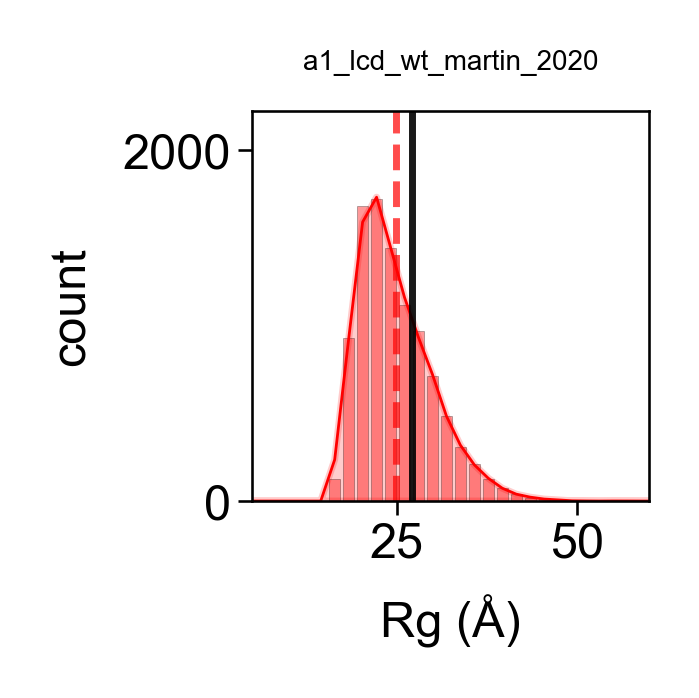

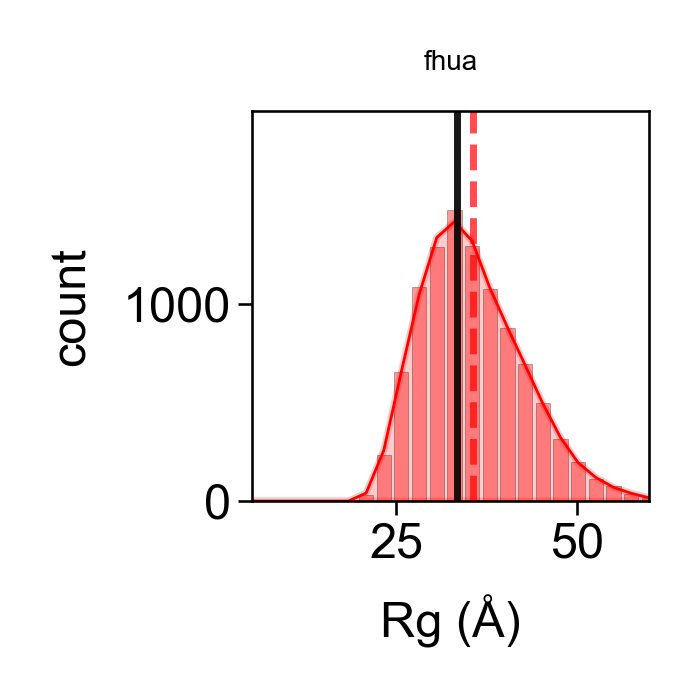

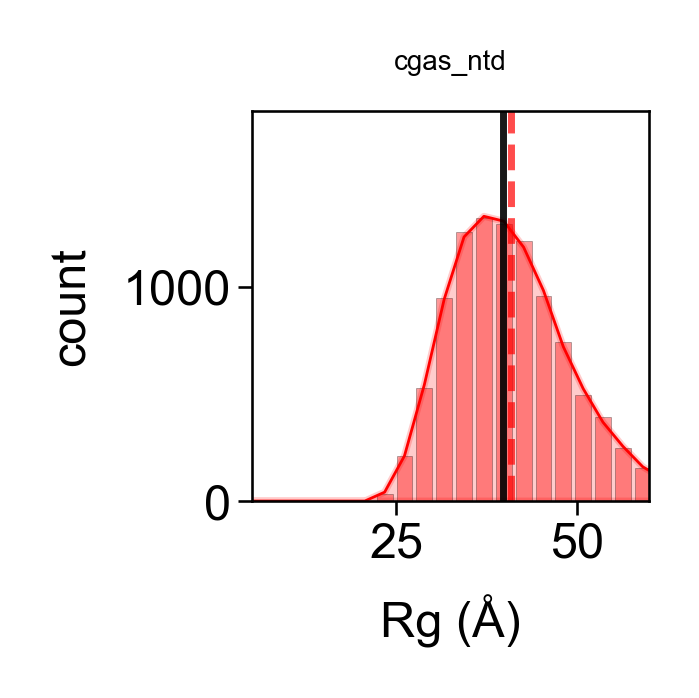

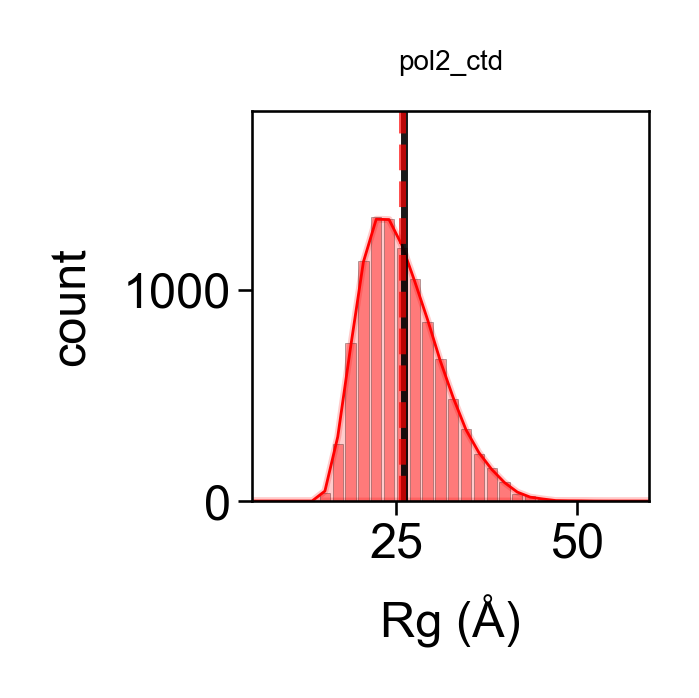

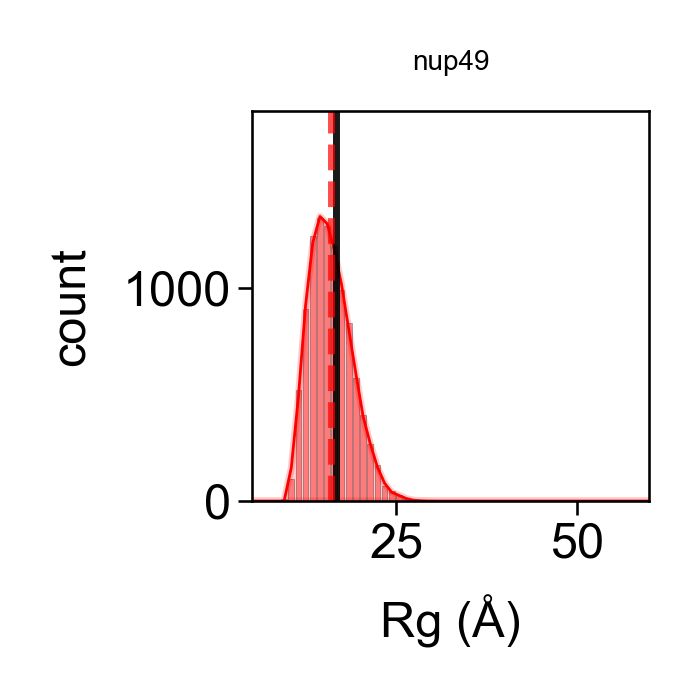

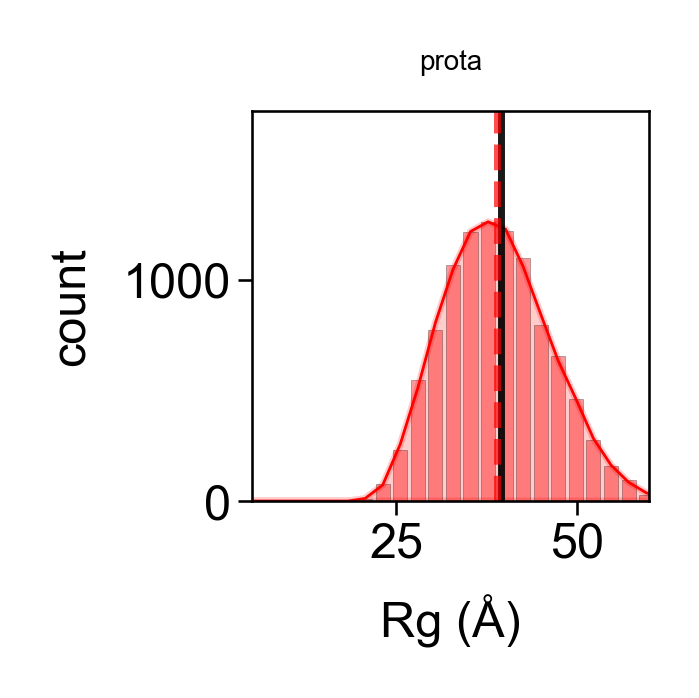

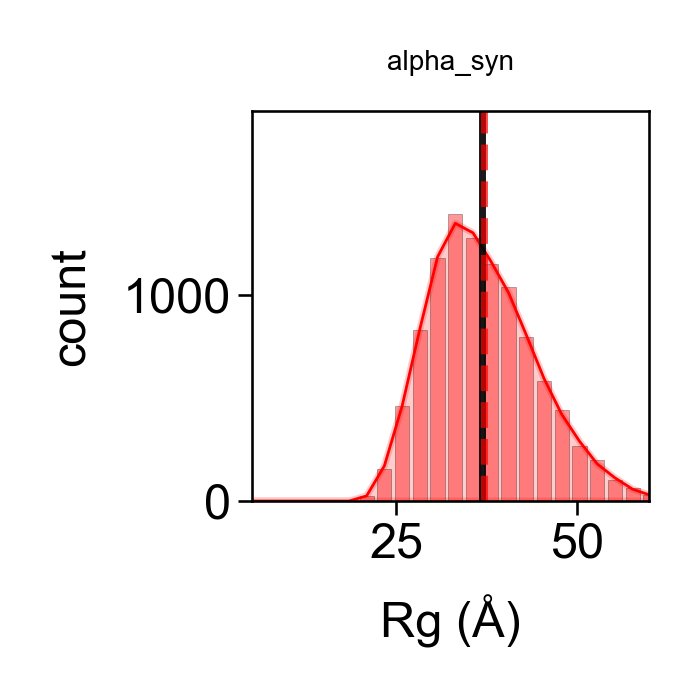

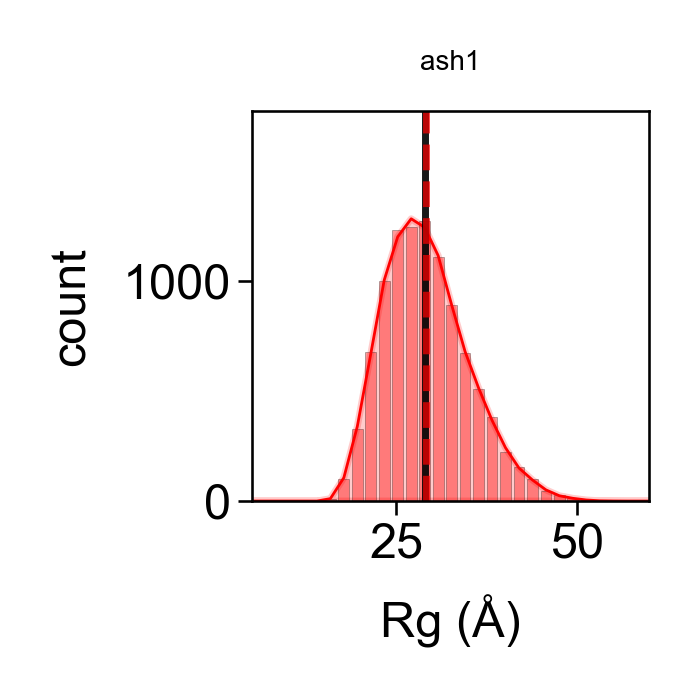

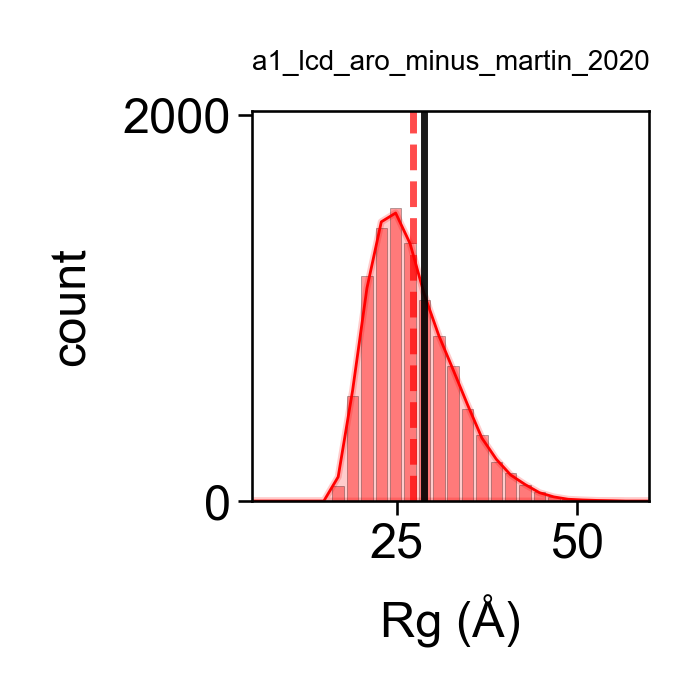

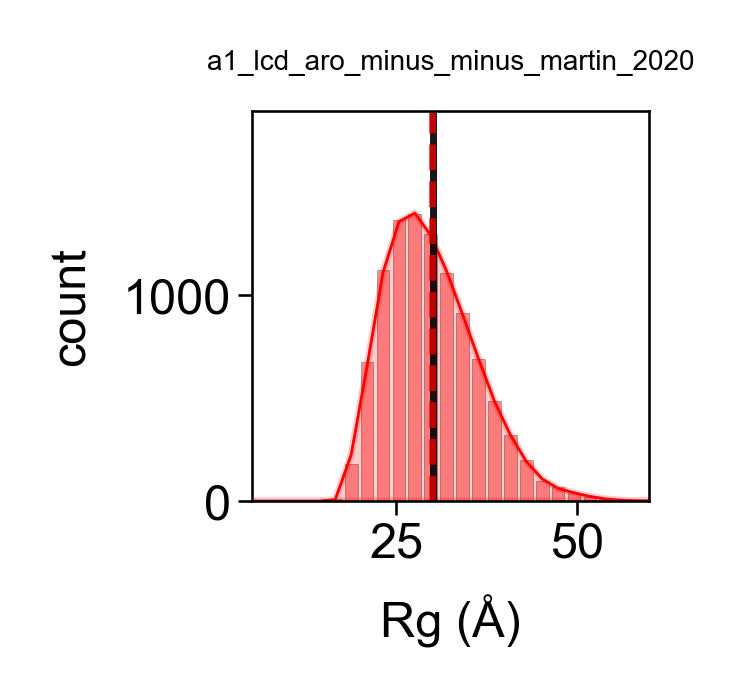

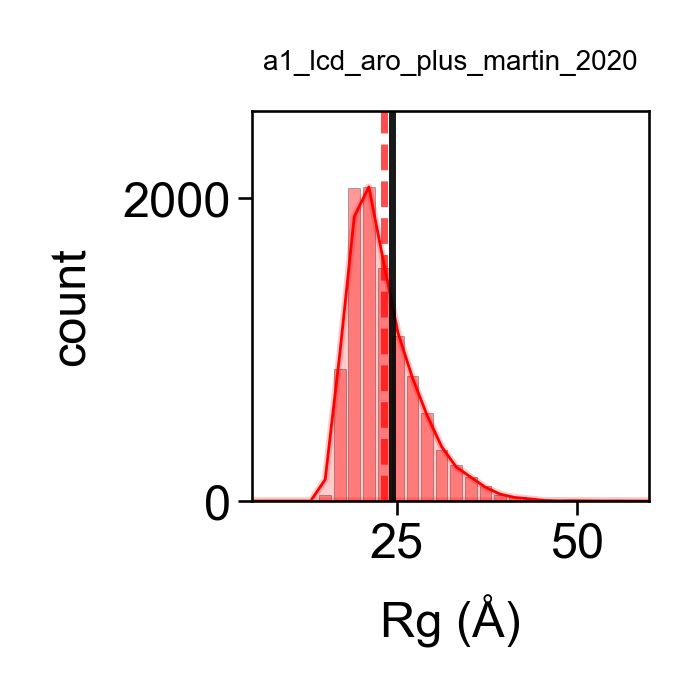

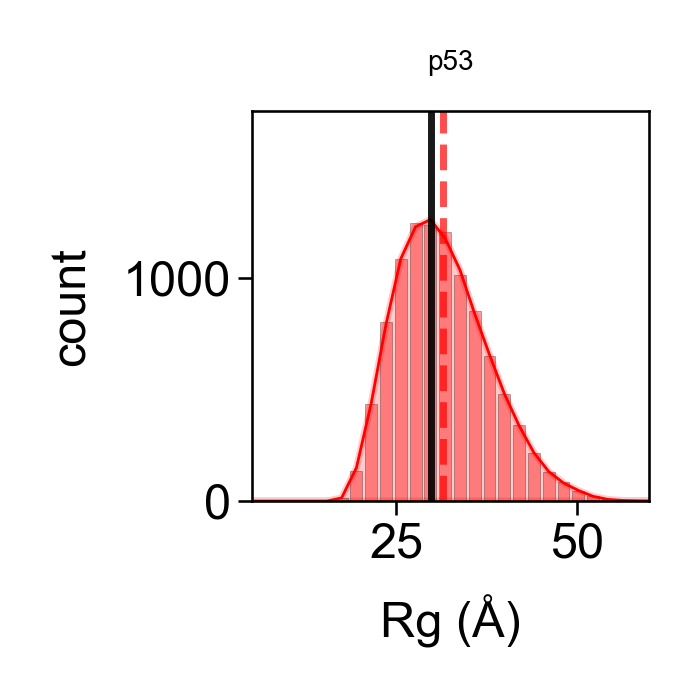

In [4]:
def get_histogram_vals(vals, bw=5, bmin=0,bmax=120, wl=5, polyorder=2):
    
    bins = np.arange(bmin,bmax,bw)
    [a,b]= np.histogram(vals,bins=bins)
    
    smoothed = savgol_filter(a,wl,polyorder)

    smoothed[smoothed<0]=0
    return b[1:]-bw*0.5, a, smoothed

def plot_histo(n, fn, color):        
    figure(None, (1.5, 1.5), dpi=250)
    ax = plt.gca()
    bw = (max(rg_vals[n]) - min(rg_vals[n]))/20
    X = get_histogram_vals(rg_vals[n], bw=bw)
    
    plt.plot(X[0],X[2], color='r', lw=0.4)
    plt.fill_between(X[0], 0, X[2], alpha=0.2, color=color)
    plt.bar(X[0],X[1], width=bw*0.8, color=color,alpha=0.4, edgecolor='k',lw=0.1)
    plt.ylim([0, max(X[1])+500])
    plt.xlim([5, 60])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.ylabel('count', fontsize=7)
    plt.xlabel('Rg (Å)', fontsize=7)
    plt.title(n, fontsize=4)
    ax.axvline(saxs_rgs[n], color='k',lw=1, alpha=0.9)
    ax.axvline(np.mean(rg_vals[n]), color='r',lw=1, alpha=0.7,ls='--')
    
    plt.tight_layout()
    plt.savefig(fn)


for n in rg_vals:
    plot_histo(n,f'figures/big_ensembles/{n}.pdf', 'r')
    
    